In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Fraud_Detection.csv')

In [23]:
colums =['type','amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'] 
p_data = data[colums].copy()

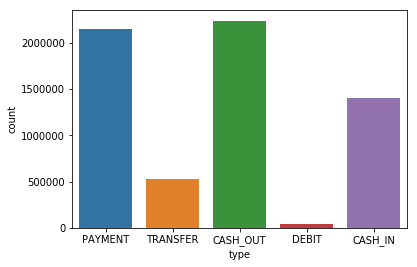

In [24]:
#Within the PaySim CASH_OUT & PAYMENT are the majority of the Transactions
data.type.value_counts()
sb.countplot(data.type)

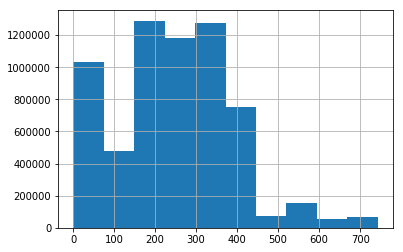

In [25]:
#Determining how often transactions occur
data['step'].hist()

The % of Fraud Transactions are: 0.12908204481801522 %


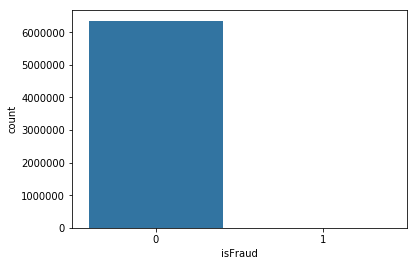

In [26]:
#TRANSFER & CASH_OUT are the only two that have fraud flags
data.isFraud.value_counts()
sb.countplot(p_data.isFraud)
counts = (p_data[(p_data.isFraud == 1)].isFraud.count() / p_data.isFraud.count()) * 100 
print('The % of Fraud Transactions are:', counts, '%')

Number of Fraud Transfers 4097
Number of Fraud Cash Out 4116


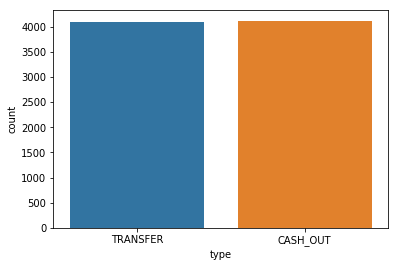

In [22]:
#the amount of Fraud Transactions that have not been flagged by the agency properly
df = data[(data.isFraud == 1)]
ax = sb.countplot(df.type)
print('Number of Fraud Transfers',df[(df.type == 'TRANSFER')].type.count())
print('Number of Fraud Cash Out',df[(df.type == 'CASH_OUT')].type.count())

In [8]:
#since Transfer and Cash Out only have fraud transactions we can single these out
n_data = data.loc[data['type'].isin(['CASH_OUT', 'TRANSFER'])]
print('The new data now has', len(n_data), 'transactions.')

The new data now has 2770409 transactions.


In [9]:
#See if there are any negative balances since that is impossible
print('Number of transactions where the transaction amount is negative:', n_data[n_data.amount < 0].amount.count() )
#If there are any transactions that = to 0 then it was Flagged and Canceled
print('Number of transactions where the transaction amount is zero:', n_data[n_data.amount == 0].amount.count() )

Number of transactions where the transaction amount is negative: 0
Number of transactions where the transaction amount is zero: 16


In [10]:
#remove all of the canceled transactions
n_data = n_data.loc[n_data['amount'] > 0]

In [11]:
#From this, most of the fraud transactions come from the first half of the transaction
print("The % of inacurate statements in the orginal acount", sum(((n_data["oldbalanceOrg"] - n_data["newbalanceOrig"] - n_data["amount"]) != 0)) / n_data.type.count() * 100, '%')
print("The % of inacurate statements in the destination acount", sum(((n_data["newbalanceDest"] - n_data["oldbalanceDest"]- n_data["amount"]) != 0)) / n_data.type.count() * 100, '%')

The % of inacurate statements in the orginal acount 94.45071511514791 %
The % of inacurate statements in the destination acount 72.61442690621872 %


In [12]:
dummies = pd.get_dummies(p_data.type)
p_data = pd.concat([p_data, dummies], axis=1).drop("type", axis=1)
p_data = p_data.drop("isFraud", axis=1)
p_data = p_data.drop("isFlaggedFraud", axis=1)

In [13]:
#Using the random forest classifier to fit a number of decision with these subsets to predict the accury of detecting non-fraud transactions and fraud transactions
rfc = RandomForestClassifier()
x = p_data
y = data ['isFraud']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
model = rfc.fit(xtrain,ytrain)

In [15]:
predicts = model.predict(xtest)

In [18]:
print(classification_report(ytest, predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.95      0.78      0.85      2435

   micro avg       1.00      1.00      1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



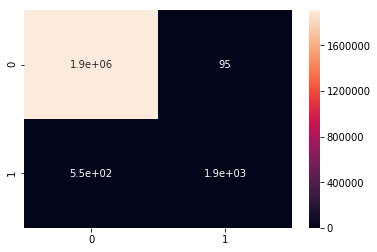

In [20]:
sb.heatmap(confusion_matrix(ytest, predicts), annot=True)